In [ ]:
#1)Download Dataset

#https://drive.google.com/drive/folders/19zV45_NQzrBPLzFymXeNZiufxbeENGth

#2) Unzip

In [58]:
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,GlobalMaxPooling2D
from keras.utils import load_img
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [3]:
Base_dir='datasets/UTKFace/'

In [5]:
images=os.listdir(Base_dir)

In [6]:
images[0]

'100_0_0_20170112213500903.jpg.chip.jpg'

In [23]:
image_paths = []
age_labels = []
gender_labels = []

for filename in images:
    image_path = os.path.join(Base_dir, filename)
    temp = filename.split('_')
    if str(temp[0]).isnumeric():
        age = int(temp[0])
        gender = int(temp[1])
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)

In [26]:
len(age_labels)

23708

In [33]:
def make_dataset(images):
    features = []
    for image in (images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [34]:
X = make_dataset(image_paths)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17940\315091844.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


In [35]:
X.shape

(23708, 128, 128, 1)

In [49]:
X=X/255.0

In [38]:
Y= np.array(age_labels)

In [39]:
Y.shape

(23708,)

In [43]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalMaxPooling2D())

model.add(Dense(132 , activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

In [44]:
model.compile(loss='mse', optimizer='adam' , metrics=['accuracy'] )

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [52]:
X_train.shape

(18966, 128, 128, 1)

In [53]:
model.fit(X_train,y_train,epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
593/593 [==============================] - 177s 295ms/step - loss: 431.0078 - accuracy: 0.0464 - val_loss: 377.7093 - val_accuracy: 0.0506
Epoch 2/10
593/593 [==============================] - 183s 309ms/step - loss: 343.7278 - accuracy: 0.0466 - val_loss: 274.9612 - val_accuracy: 0.0474
Epoch 3/10
593/593 [==============================] - 179s 302ms/step - loss: 262.3257 - accuracy: 0.0434 - val_loss: 221.9832 - val_accuracy: 0.0466
Epoch 4/10
593/593 [==============================] - 187s 315ms/step - loss: 223.1347 - accuracy: 0.0388 - val_loss: 191.8503 - val_accuracy: 0.0437
Epoch 5/10
593/593 [==============================] - 178s 300ms/step - loss: 196.4002 - accuracy: 0.0379 - val_loss: 224.3459 - val_accuracy: 0.0483
Epoch 6/10
593/593 [==============================] - 177s 298ms/step - loss: 173.2935 - accuracy: 0.0361 - val_loss: 160.2566 - val_accuracy: 0.0306
Epoch 7/10
593/593 [==============================] - 177s 299ms/step - loss: 154.1063 - accuracy: 0

In [54]:
out=model.predict(X_test)

149/149 [==============================] - 11s 72ms/step


In [55]:
out

array([[45.2855  ],
       [24.338747],
       [71.046524],
       ...,
       [31.432297],
       [33.44529 ],
       [26.501545]], dtype=float32)

In [56]:
y_test

array([38, 28, 90, ..., 24, 45, 26])

In [57]:
model.save_weights('model.h5')

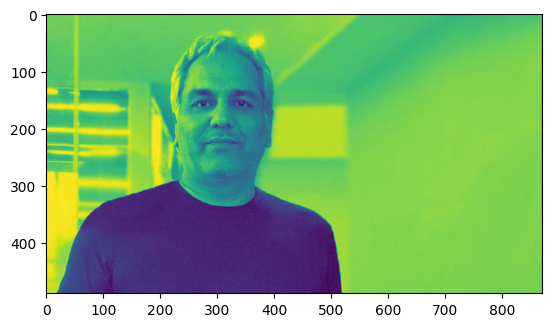

In [60]:
image_test=load_img('test.jpg',grayscale=True)

plt.close()

plt.imshow(image_test)

plt.show()


In [63]:
X_test[0].shape

(128, 128, 1)

Original Age: 9
1/1 [==============================] - 0s 26ms/step
Predicted Age: 10


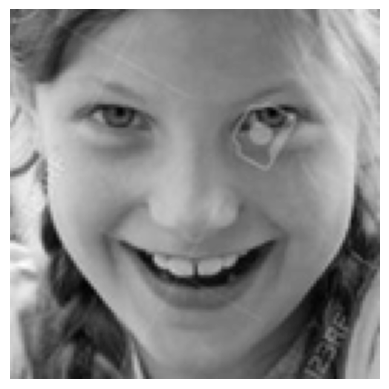

In [84]:
image_index = 50
print("Original Age:", y_test[image_index]) 
pred = model.predict(X_test[image_index].reshape(1, 128, 128, 1)) 
print("Predicted Age:", int(pred[0][0]))
plt.axis('off')
plt.imshow(X_test[image_index].reshape(128, 128), cmap='gray')

In [87]:
def make_test(images):
    features = []
    
    img = load_img(images, grayscale=True)
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = np.array(img)
    features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [88]:
 
test1=make_test('test.jpg')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17940\1731491241.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


In [90]:
test1 = test1/255.0

In [91]:
out_test1=   model.predict(test1) 

1/1 [==============================] - 0s 29ms/step


In [92]:
print(out_test1)

[[61.38032]]


In [95]:

# model = load_model('models/age_detect_cnn_model.h5')

detector = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')

cam = cv2.VideoCapture(1)

while True:
    ret,frame = cam.read()
    frame=cv2.flip(frame,1)
    if ret:
        faces = detector.detectMultiScale(frame,1.3,5)
        for x,y,w,h in faces:
            face = frame[y:y+h,x:x+w]
            face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            face = cv2.resize(face,(128,128))
            face=face/255.0
            face = face.reshape(1,128,128,1)
            age = model.predict(face,verbose=False)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            cv2.rectangle(frame,(x,y+h),(x+w,y+h+50),(255,0,0),-1)
            cv2.putText(frame, str(age[0][0]),(x+65,y+h+35),cv2.FONT_HERSHEY_DUPLEX,0.8,(255,255,255),2)
            
        cv2.imshow('Live',frame)
        
        
    if cv2.waitKey(1)==27:
        break

cam.release()
cv2.destroyAllWindows()